<a href="https://colab.research.google.com/github/AlameenWazz/IBM-Data-Analyst-Capstone/blob/main/ExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [9]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [12]:
print(df.loc[:, 'ConvertedComp'])

0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397         NaN
Name: ConvertedComp, Length: 11398, dtype: float64


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


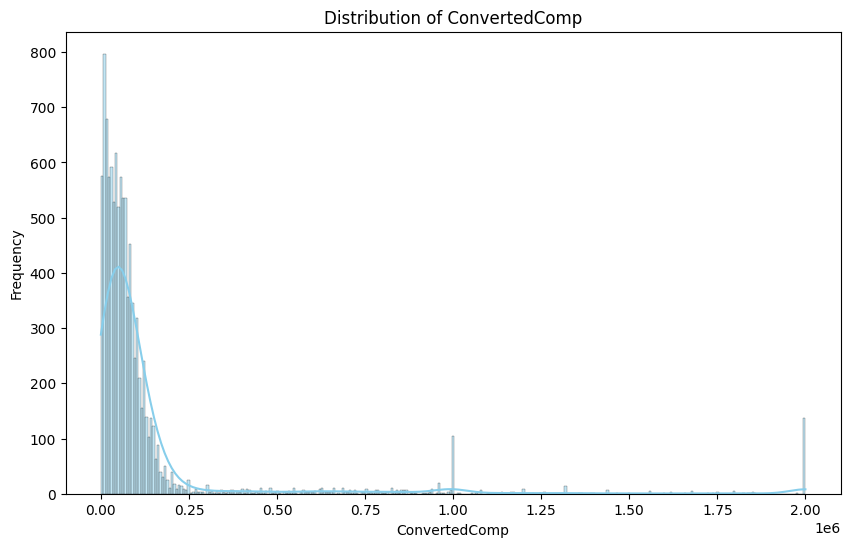

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot distribution curve
plt.figure(figsize=(10, 6))
sns.histplot(df[converted_comp_column], kde=True, color='skyblue')
plt.title(f'Distribution of {converted_comp_column}')
plt.xlabel(converted_comp_column)
plt.ylabel('Frequency')
plt.show()

Plot the histogram for the column `ConvertedComp`.


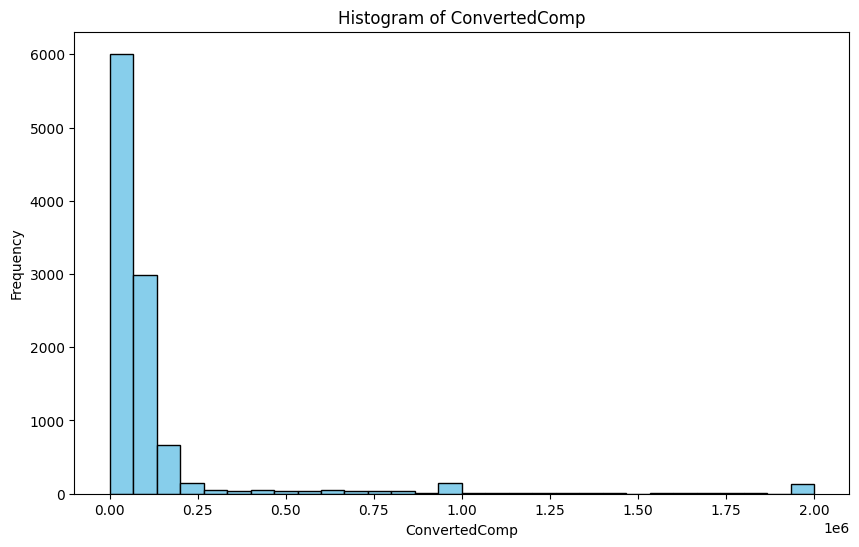

In [16]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')
plt.show()

What is the median of the column `ConvertedComp`?


In [17]:
# Calculate the median of the 'ConvertedComp' column
median_converted_comp = df['ConvertedComp'].median()

# Print the result
print(f"The median of the 'ConvertedComp' column is: {median_converted_comp}")

The median of the 'ConvertedComp' column is: 57745.0


How many responders identified themselves only as a **Man**?


In [18]:
man_responses = df[df['Gender'] == 'Man']

# Count the number of rows in the filtered DataFrame
count_man_responses = len(man_responses)

# Print the result
print(f"The number of responders who identified themselves only as a Man is: {count_man_responses}")


The number of responders who identified themselves only as a Man is: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [19]:
# Filter the DataFrame to include only rows where 'Gender' is 'Woman'
woman_responses = df[df['Gender'] == 'Woman']

# Calculate the median 'ConvertedComp' for the filtered DataFrame
median_woman_comp = woman_responses['ConvertedComp'].median()

# Print the result
print(f"The median ConvertedComp of responders identified themselves only as a Woman is: {median_woman_comp}")


The median ConvertedComp of responders identified themselves only as a Woman is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [20]:
# Calculate the five-number summary for the 'Age' column
five_number_summary = df['Age'].describe(percentiles=[.25, .5, .75])

# Print the result
print("Five-Number Summary for the 'Age' column:")
print(five_number_summary[['min', '25%', '50%', '75%', 'max']])

Five-Number Summary for the 'Age' column:
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


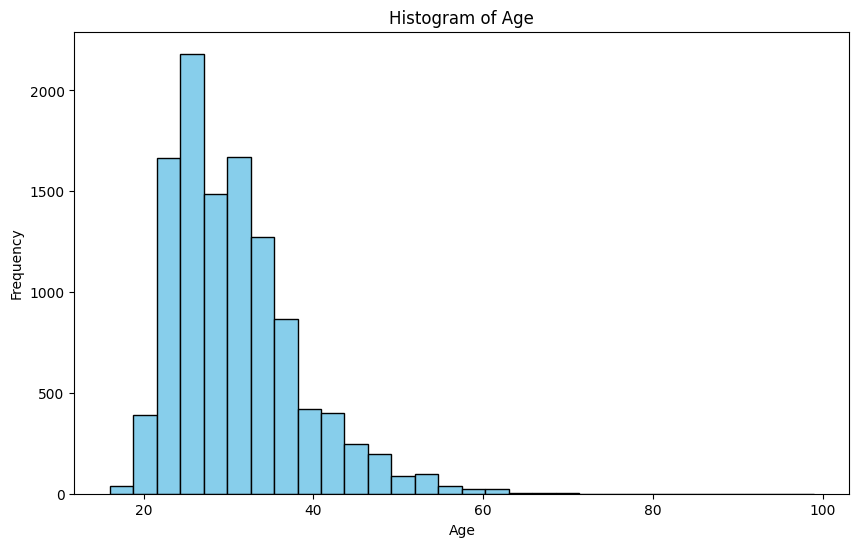

In [23]:
# Plot a histogram for the 'Age' column
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


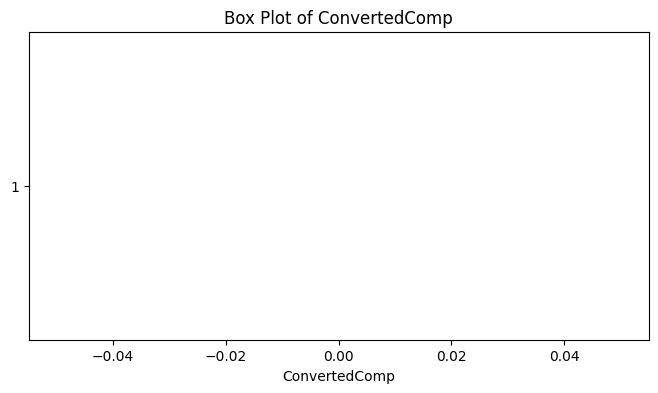

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with a column 'ConvertedComp'
# If 'ConvertedComp' doesn't exist in your DataFrame, replace it with the actual column name.

# Plot a box plot for ConvertedComp
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'], vert=False, patch_artist=True)
plt.title('Box Plot of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.show()

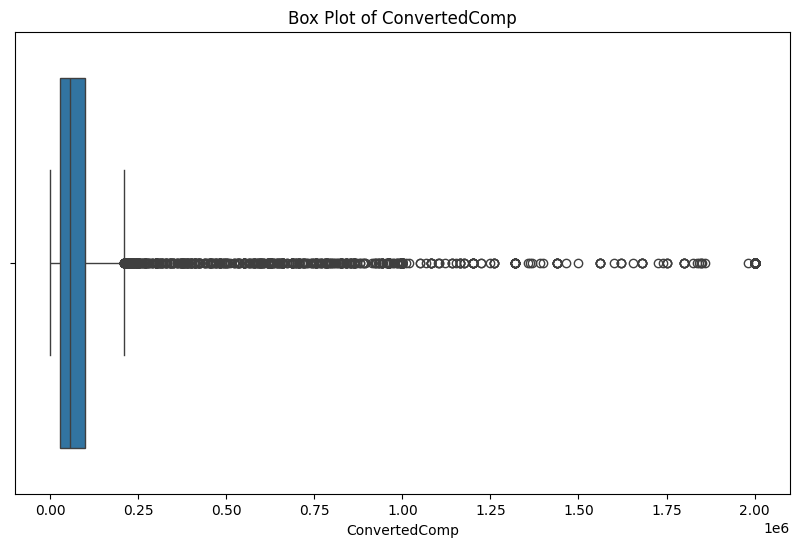

In [47]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Create a box plot for ConvertedComp
sns.boxplot(x=df['ConvertedComp'])
plt.title('Box Plot of ConvertedComp')
plt.xlabel('ConvertedComp')

plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [22]:
# Calculate the first quartile (Q1)
Q1 = df['ConvertedComp'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Print the result
print(f"The Interquartile Range (IQR) for ConvertedComp is: {IQR}")


The Interquartile Range (IQR) for ConvertedComp is: 73132.0


Find out the upper and lower bounds.


In [25]:
# Calculate the first quartile (Q1)
Q1 = df['ConvertedComp'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the results
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [26]:
# Calculate the first quartile (Q1)
Q1 = df['ConvertedComp'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

# Print the result
print(f"The number of outliers in the 'ConvertedComp' column is: {num_outliers}")


The number of outliers in the 'ConvertedComp' column is: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [30]:
# Calculate the first quartile (Q1)
Q1 = df['ConvertedComp'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Print the result
print("Original DataFrame shape:", df.shape)
print("DataFrame shape without outliers:", df_no_outliers.shape)



Original DataFrame shape: (11398, 85)
DataFrame shape without outliers: (9703, 85)


In [31]:
# Calculate the first quartile (Q1)
Q1 = df['ConvertedComp'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Calculate the median of the 'ConvertedComp' column after removing outliers
median_converted_comp_no_outliers = df_no_outliers['ConvertedComp'].median()

# Print the result
print(f"The median of 'ConvertedComp' after removing outliers is: {median_converted_comp_no_outliers}")


The median of 'ConvertedComp' after removing outliers is: 52704.0


In [32]:
# Calculate the first quartile (Q1)
Q1 = df['ConvertedComp'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Calculate the mean of the 'ConvertedComp' column after removing outliers
mean_converted_comp_no_outliers = df_no_outliers['ConvertedComp'].mean()

# Print the result
print(f"The mean of 'ConvertedComp' after removing outliers is: {mean_converted_comp_no_outliers}")


The mean of 'ConvertedComp' after removing outliers is: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [33]:
# Select all numerical columns (excluding 'Age') for correlation
numerical_columns = df.select_dtypes(include='number').columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corrwith(df['Age'])

# Print the correlation values
print("Correlation between Age and other numerical columns:")
print(correlation_matrix)

Correlation between Age and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
